In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from keras.preprocessing.sequence import TimeseriesGenerator

import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten

In [3]:
d1 = pd.read_csv('NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Training_1_all_features.csv')
d2 = pd.read_csv('NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Training_2_all_features.csv')
d3 = pd.read_csv('NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Training_3_all_features.csv')
d4 = pd.read_csv('NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Training_4_all_features.csv')

In [4]:
data_frame = pd.concat([d1,d2,d3,d4])

In [5]:
data_frame.shape

(160359, 26)

In [6]:
data_frame.isnull().sum()

Cycle              0
OpSet1             0
OpSet2             0
OpSet3             0
SensorMeasure1     0
SensorMeasure2     0
SensorMeasure3     0
SensorMeasure4     0
SensorMeasure5     0
SensorMeasure6     0
SensorMeasure7     0
SensorMeasure8     0
SensorMeasure9     0
SensorMeasure10    0
SensorMeasure11    0
SensorMeasure12    0
SensorMeasure13    0
SensorMeasure14    0
SensorMeasure15    0
SensorMeasure16    0
SensorMeasure17    0
SensorMeasure18    0
SensorMeasure19    0
SensorMeasure20    0
SensorMeasure21    0
labels             0
dtype: int64

In [7]:
X = data_frame.iloc[:,0:25]

In [8]:
data_frame.head()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0


In [12]:
X.shape

(160359, 25)

In [9]:
Y = data_frame['labels']

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,shuffle=True,random_state=35)

In [11]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((128287, 25), (32072, 25), (128287,), (32072,))

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [25]:
model = keras.Sequential([
                        keras.layers.Flatten(input_shape=(25,)),
                        keras.layers.Dense(40,activation='relu'),
                        keras.layers.Dense(256,activation='relu'),
                        keras.layers.Dense(3,activation='softmax')
                        ])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 25)                0         
                                                                 
 dense_9 (Dense)             (None, 40)                1040      
                                                                 
 dense_10 (Dense)            (None, 256)               10496     
                                                                 
 dense_11 (Dense)            (None, 3)                 771       
                                                                 
Total params: 12,307
Trainable params: 12,307
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit(X_train_std,Y_train,epochs=15,batch_size=16,validation_split=0.25)

Epoch 1/15
6014/6014 [==============================] - 36s 6ms/step - loss: 0.3823 - accuracy: 0.8244 - val_loss: 0.3600 - val_accuracy: 0.8350
Epoch 2/15
6014/6014 [==============================] - 35s 6ms/step - loss: 0.3237 - accuracy: 0.8552 - val_loss: 0.2996 - val_accuracy: 0.8651
Epoch 3/15
6014/6014 [==============================] - 35s 6ms/step - loss: 0.3134 - accuracy: 0.8581 - val_loss: 0.2955 - val_accuracy: 0.8670
Epoch 4/15
6014/6014 [==============================] - 35s 6ms/step - loss: 0.3073 - accuracy: 0.8617 - val_loss: 0.3012 - val_accuracy: 0.8637
Epoch 5/15
6014/6014 [==============================] - 35s 6ms/step - loss: 0.3027 - accuracy: 0.8647 - val_loss: 0.3004 - val_accuracy: 0.8653
Epoch 6/15
6014/6014 [==============================] - 35s 6ms/step - loss: 0.2993 - accuracy: 0.8655 - val_loss: 0.2897 - val_accuracy: 0.8689
Epoch 7/15
6014/6014 [==============================] - 35s 6ms/step - loss: 0.2949 - accuracy: 0.8672 - val_loss: 0.2825 - val_ac

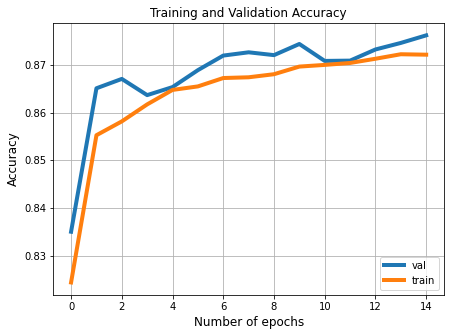

In [29]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_accuracy'],linewidth = 4)
plt.plot(history.history['accuracy'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

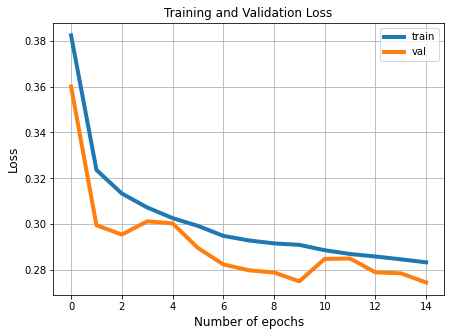

In [30]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()


In [31]:
loss,accuracy = model.evaluate(X_test_std,Y_test)

1003/1003 [==============================] - 4s 4ms/step - loss: 0.2793 - accuracy: 0.8757


In [32]:
testing_data = pd.read_csv(r'NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Test_classification_1.csv')

In [33]:
testing_data.head()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0
3,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0
4,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0


In [35]:
testing_data.shape

(13096, 26)

In [37]:
test_X = testing_data.iloc[:,0:-1]

In [39]:
test_Y = testing_data['labels']

In [40]:
test_X.shape,test_Y.shape

((13096, 25), (13096,))

In [41]:
test_X_std = scaler.fit_transform(test_X)

In [48]:
test_X_std[200]

array([ 8.32398127e-01, -1.76528122e-01, -3.54527477e-01,  0.00000000e+00,
        0.00000000e+00,  1.43411095e+00,  1.45126431e+00,  1.14003836e+00,
       -1.77635684e-15,  1.75659965e-01, -6.27547260e-01,  1.89826532e+00,
       -1.17852141e+00, -2.22044605e-16,  1.14234130e+00, -1.56846905e+00,
        1.38718243e+00, -1.27773272e+00,  2.18407170e+00, -1.04083409e-17,
       -4.63405876e-01,  0.00000000e+00,  0.00000000e+00, -7.23495867e-01,
       -1.91212908e+00])

In [44]:
testing_data.head()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0
3,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0
4,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0


In [51]:
test_input = (-1.42937481e+00,  1.04929536e+00,  1.00592724e+00,  0.00000000e+00,
        0.00000000e+00,  1.35927635e+00, -5.61494661e-01, -9.75674241e-01,
       -1.77635684e-15,  1.75659965e-01,  2.09137586e-01, -5.39077944e-01,
       -7.20312188e-01, -2.22044605e-16, -1.10359065e+00, -4.95415753e-02,
       -7.20590213e-01, -1.31503071e+00, -7.11659235e-01, -1.04083409e-17,
       -4.63405876e-01,  0.00000000e+00,  0.00000000e+00, -2.29408490e-01,
        4.48866185e-01)
test_input = np.asarray(test_input)
test_input_new = test_input.reshape(1,-1)

prediction = model.predict(test_input_new)
print(prediction)

prediction_labels = [np.argmax(prediction)]
print(prediction_labels)

if prediction_labels[0] == 0:
    print("Early Stage")
elif prediction_labels[0] == 1:
    print("Mid Stage")
elif prediction_labels[0] == 2:
    print("End Stage")

[[1.000000e+00 6.506054e-32 0.000000e+00]]
[0]
Early Stage


In [50]:
test_input = (8.32398127e-01, -1.76528122e-01, -3.54527477e-01,  0.00000000e+00,
        0.00000000e+00,  1.43411095e+00,  1.45126431e+00,  1.14003836e+00,
       -1.77635684e-15,  1.75659965e-01, -6.27547260e-01,  1.89826532e+00,
       -1.17852141e+00, -2.22044605e-16,  1.14234130e+00, -1.56846905e+00,
        1.38718243e+00, -1.27773272e+00,  2.18407170e+00, -1.04083409e-17,
       -4.63405876e-01,  0.00000000e+00,  0.00000000e+00, -7.23495867e-01,
       -1.91212908e+00)
test_input = np.asarray(test_input)
test_input_new = test_input.reshape(1,-1)

prediction = model.predict(test_input_new)
print(prediction)

prediction_labels = [np.argmax(prediction)]
print(prediction_labels)

if prediction_labels[0] == 0:
    print("Early Stage")
elif prediction_labels[0] == 1:
    print("Mid Stage")
elif prediction_labels[0] == 2:
    print("End Stage")

[[0. 0. 1.]]
[2]
End Stage
